In [4]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#using GCP youtube v3 API services

# this is demo testing to check my API credentials are working or not
api_key=''

channel_id='UCn4rEMqKtwBQ6-oEwbd4PcA'

youtube= build('youtube','v3',developerKey=api_key)

## Fetching 

#### all the youtube video IDs from the CSV file using the pandas

In [7]:
df_csv = pd.read_csv('links_1.csv')

In [8]:
video_list = df_csv['youtubeId'].astype(str).tolist()

### Video_list has all the ids 

In [9]:
len(video_list)

12950

In [10]:


def task_45(video_id=None, pageToken=None):
    lst=[]
    try:
        vid = video_id
        video_responses = youtube.commentThreads().list(
        part='snippet, replies',
        videoId=vid, maxResults=100,pageToken=pageToken
    ).execute()
        count = 0
        
        for item in video_responses['items']:
            totl={}
            count +=1
            totl['comment'] = item['snippet']['topLevelComment']['snippet']['textDisplay']     
            totl['user_id']=item['snippet']['topLevelComment']['snippet']['authorChannelId']['value']
            lst.append(totl)
            
    except HttpError as e:
        print('sd')
        raise e  # Let the error propagate to be handled in the calling function
    
    return lst

     

In [11]:
### Total number of ids are verified and tallied with the CSV sheet

In [12]:
def basic_video(youtube,video_id):
    """
    :func : use the api_key to fetch details of youtube video using GCP API service and resources
    :inp youtube : build resource parameter, having personal API key and requesting service name
    :video_id: list of video ids given --> array of strings.
    :return dict: details of the video in different d_format.
    """
    print(len(video_id)/2)
    lst=[] #empty list
    for i in range(0,len(video_id),50): #youtube allows only 50 videos per request so passing in multiples of 50
        print(f"now going through of {i}/len(vidvideo_id)")
        request = youtube.videos().list(part='snippet,statistics,contentDetails',id=','.join(video_id[i:i+50])) #used join methoed during demo and felt it can be used for all the cases 
        response=request.execute() # the response is having all the details in JSON format
        for i in response['items']: #items is main key value of the JSON
            print(f"now_id:{i['id']}")
            details=dict() #creating a empty dict for stroing the values 
            details['title']=i['snippet']['title']
            details['desc']=i['snippet']['description']
            details['Date']=i['snippet']['publishedAt']
            try:
                details['comments'] = task_45(video_id= i['id'])
            except HttpError as e:
                if e.resp.status== 403:
                    print(f"Comments are disabled for video {i['id']}. Skipping...")
                    details['comments'] = "comments_disabled"
                else:
                    print(f"Error fetching comments for video {i['id']}: {e}")
                    details['comments'] = "i dont know the issue"
            #there was an error in accessing the contentDetails tag, so the check is created for durtaion and other count values 
            if 'contentDetails' in i:
                details['duration']=i['contentDetails']['duration']
            else:
                details['duration']=np.nan
            #null value check
            check=['viewCount','likeCount','commentCount','favoriteCount']
            for j in check:
                if j in i['statistics']:
                    details[j]=i['statistics'][j]
                else:
                    details[j]=np.nan
                    
            #final append
            lst.append(details)
            
    return lst
    
    

In [13]:
# temp=video_list[:49] ## i tried to test only for first 50 entries 

In [14]:
from googleapiclient.errors import HttpError
11750

11750

In [15]:
11750

11750

In [16]:
12811*2

25622

In [17]:
25622-12950

12672

In [18]:
data_=basic_video(youtube,video_list)

6475.0
now going through of 0/len(vidvideo_id)
now_id:K26_sDKnvMU
sd
Comments are disabled for video K26_sDKnvMU. Skipping...
now_id:3LPANjHlPxo
sd
Comments are disabled for video 3LPANjHlPxo. Skipping...
now_id:rEnOoWs3FuA
now_id:j9xml1CxgXI
sd
Comments are disabled for video j9xml1CxgXI. Skipping...
now_id:2GfZl4kuVNI
now_id:twTksx_lWB4
sd
Comments are disabled for video twTksx_lWB4. Skipping...
now_id:-C-xXZyX2zU
sd
Comments are disabled for video -C-xXZyX2zU. Skipping...
now_id:lcOqUE0u1LM
now_id:UrC75wUKoFM
now_id:tVdn8JH91Dg
now_id:dO2LWKpeyI8
now_id:EJXDMwGWhoA
now_id:DfqPjRMsRP0
now_id:yNLaTtpovys
now_id:lsmXhM4yfU0
now_id:OOTTvrb4JZI
now_id:gHl-UHu2-lM
now_id:UMlYWZgCIgo
now_id:RQLVzTtt2Ws
now_id:lYSHAyODiGs
now_id:toH1vzAmDBI
now_id:mQf3Ngg2cks
now_id:gA-5nLQCmW8
now_id:15s4Y9ffW_o
now_id:3_wez2B83ic
now_id:tVxeoUtVF0o
now_id:ccq3f9-lQyM
now_id:qpQ-CnutDy0
now_id:6PKq7YSpO6c
sd
Comments are disabled for video 6PKq7YSpO6c. Skipping...
now_id:XuHEa7pWAQY
now_id:OXc0-EME0C8
now_

In [19]:
12950*2

25900

In [20]:
# data_

In [21]:
sample_pd=pd.DataFrame(data_) #converting it to the pandas dataframe

In [22]:
sample_pd

title  \
0              Toy Story (1995) Trailer 2 (VHS Capture)   
1                                  Jumanji Trailer 1995   
2                            Grumpier Old Men - Trailer   
3                                     Waiting To Exhale   
4                                Heat Trailer HD (1995)   
...                                                 ...   
9584                           Eden Lake (2008) Trailer   
9585                            Coraline Web Trailer HD   
9586  Psychomania (1973) Trailer - out on BFI DVD & ...   
9587            Chocolate Fighter Jeeja Yanin Tribute 5   
9588                             Final Blackout Trailer   

                                                   desc                  Date  \
0     Trailer for Toy Story (1995) captured from the...  2015-05-26T17:11:42Z   
1     Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09T22:16:31Z   
2     The more things change, the more they stay the...  2010-10-26T19:41:25Z   
3     Whitney Houston and Angela Bassett star in thi...  2013-02-23T13:35:44Z   
4     Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29T04:48:30Z   
...                                                 ...                   ...   
9584  Skriken fr√•n hennes torterade pojkv√§n ekar i J...  2008-12-11T14:20:17Z   
9585  Visit http://www.coraline.com \r\nIn theatres ...  2009-01-22T23:15:28Z   
9586  Subscribe: http://bit.ly/subscribetotheBFI.\n\...  2016-08-22T09:57:47Z   
9587                                                     2009-09-17T16:02:43Z   
9588                                   Blackout Trailer  2007-10-27T03:26:22Z   

                                               comments duration viewCount  \
0                                     comments_disabled  PT1M31S    118106   
1                                     comments_disabled  PT2M48S    199055   
2     [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S    224358   
3                                     comments_disabled  PT2M40S    437779   
4     [{'comment': 'The scene in which the lady with...  PT2M28S   1507169   
...                                                 ...      ...       ...   
9584  [{'comment': 'Stupid ending with no satisfacti...  PT2M27S   1364843   
9585                                  comments_disabled   PT2M9S   3241719   
9586  [{'comment': 'Oh so that&#39;s where the begin...  PT2M51S     36009   
9587  [{'comment': 'Love you so much', 'user_id': 'U...  PT3M52S     17506   
9588  [{'comment': 'Michael B Jordan üéâüéâ', 'user_id':...  PT2M36S    109853   

     likeCount commentCount favoriteCount  
0          151            0             0  
1          286          NaN             0  
2          221           13             0  
3          NaN          NaN             0  
4         8245          681             0  
...        ...          ...           ...  
9584      1255          854             0  
9585      7836            0             0  
9586       387           36             0  
9587        37            1             0  
9588       177           32             0  

[9589 rows x 9 columns]

In [23]:
#data conversion for date and number values 
sample_pd['Date']=pd.to_datetime(sample_pd['Date']).dt.date
sample_pd['viewCount']=pd.to_numeric(sample_pd['viewCount'])
sample_pd['likeCount']=pd.to_numeric(sample_pd['likeCount'])
sample_pd['commentCount']=pd.to_numeric(sample_pd['commentCount'])
sample_pd['favoriteCount']=pd.to_numeric(sample_pd['favoriteCount'])

In [24]:
sample_pd

title  \
0              Toy Story (1995) Trailer 2 (VHS Capture)   
1                                  Jumanji Trailer 1995   
2                            Grumpier Old Men - Trailer   
3                                     Waiting To Exhale   
4                                Heat Trailer HD (1995)   
...                                                 ...   
9584                           Eden Lake (2008) Trailer   
9585                            Coraline Web Trailer HD   
9586  Psychomania (1973) Trailer - out on BFI DVD & ...   
9587            Chocolate Fighter Jeeja Yanin Tribute 5   
9588                             Final Blackout Trailer   

                                                   desc        Date  \
0     Trailer for Toy Story (1995) captured from the...  2015-05-26   
1     Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2     The more things change, the more they stay the...  2010-10-26   
3     Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4     Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   
...                                                 ...         ...   
9584  Skriken fr√•n hennes torterade pojkv√§n ekar i J...  2008-12-11   
9585  Visit http://www.coraline.com \r\nIn theatres ...  2009-01-22   
9586  Subscribe: http://bit.ly/subscribetotheBFI.\n\...  2016-08-22   
9587                                                     2009-09-17   
9588                                   Blackout Trailer  2007-10-27   

                                               comments duration  viewCount  \
0                                     comments_disabled  PT1M31S   118106.0   
1                                     comments_disabled  PT2M48S   199055.0   
2     [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224358.0   
3                                     comments_disabled  PT2M40S   437779.0   
4     [{'comment': 'The scene in which the lady with...  PT2M28S  1507169.0   
...                                                 ...      ...        ...   
9584  [{'comment': 'Stupid ending with no satisfacti...  PT2M27S  1364843.0   
9585                                  comments_disabled   PT2M9S  3241719.0   
9586  [{'comment': 'Oh so that&#39;s where the begin...  PT2M51S    36009.0   
9587  [{'comment': 'Love you so much', 'user_id': 'U...  PT3M52S    17506.0   
9588  [{'comment': 'Michael B Jordan üéâüéâ', 'user_id':...  PT2M36S   109853.0   

      likeCount  commentCount  favoriteCount  
0         151.0           0.0              0  
1         286.0           NaN              0  
2         221.0          13.0              0  
3           NaN           NaN              0  
4        8245.0         681.0              0  
...         ...           ...            ...  
9584     1255.0         854.0              0  
9585     7836.0           0.0              0  
9586      387.0          36.0              0  
9587       37.0           1.0              0  
9588      177.0          32.0              0  

[9589 rows x 9 columns]

In [25]:
sample_pd.to_csv('first_table.csv')

In [26]:
# Load the CSV files into separate DataFrames
df1 = pd.read_csv('first_table.csv')
df2 = pd.read_csv('last_table_sec_day_limt.csv')

# Concatenate the DataFrames, ignore the original index to get a continuous index
merged_df = pd.concat([df1, df2], ignore_index=True)


In [27]:
df1.shape

(9589, 10)

In [28]:
df2.shape

(8436, 10)

In [29]:
merged_df

Unnamed: 0                                        title  \
0               0     Toy Story (1995) Trailer 2 (VHS Capture)   
1               1                         Jumanji Trailer 1995   
2               2                   Grumpier Old Men - Trailer   
3               3                            Waiting To Exhale   
4               4                       Heat Trailer HD (1995)   
...           ...                                          ...   
18020        8431                –û —á–µ–º –≥–æ–≤–æ—Ä—è—Ç –º—É–∂—á–∏–Ω—ã-–¢—Ä–µ–π–ª–µ—Ä   
18021        8432                   Three Quarter Moon Trailer   
18022        8433                               Brother Bear 2   
18023        8434      Forklift Driver Klaus English Subtitles   
18024        8435  INNOCENCE (2014) - Official Movie Trailer 1   

                                                    desc        Date  \
0      Trailer for Toy Story (1995) captured from the...  2015-05-26   
1      Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2      The more things change, the more they stay the...  2010-10-26   
3      Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4      Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   
...                                                  ...         ...   
18020  –û—Ç —Å–æ–∑–¥–∞—Ç–µ–ª–µ–π —Ñ–∏–ª—å–º–æ–≤ "–î–µ–Ω—å –≤—ã–±–æ—Ä–æ–≤" –∏ "–î–µ–Ω—å —Ä...  2010-01-15   
18021                                                     2012-06-11   
18022  Kenai takes an exciting adventure he never dre...  2012-01-04   
18023    Crazy German video about forklift driver safety  2010-06-12   
18024  A young woman discovers her elite Manhattan pr...  2013-09-13   

                                                comments duration  viewCount  \
0                                      comments_disabled  PT1M31S   118106.0   
1                                      comments_disabled  PT2M48S   199055.0   
2      [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224358.0   
3                                      comments_disabled  PT2M40S   437779.0   
4      [{'comment': 'The scene in which the lady with...  PT2M28S  1507169.0   
...                                                  ...      ...        ...   
18020  [{'comment': '–ü–µ—Å–Ω—è –ë–∏-2, &quot;–†–µ–∫–∏ –ª—é–±–≤–∏&quo...  PT2M30S   513404.0   
18021                                                 []  PT2M15S     1996.0   
18022                                  comments_disabled  PT1M26S  1809800.0   
18023  [{'comment': 'Too bad training videos can&#39;...  PT9M20S  2578896.0   
18024  [{'comment': 'this film fascinates me I have n...  PT2M33S  9409449.0   

       likeCount  commentCount  favoriteCount  
0          151.0           0.0              0  
1          286.0           NaN              0  
2          221.0          13.0              0  
3            NaN           NaN              0  
4         8245.0         681.0              0  
...          ...           ...            ...  
18020      380.0          28.0              0  
18021        6.0           0.0              0  
18022        NaN           NaN              0  
18023    32150.0        1643.0              0  
18024    23037.0        1012.0              0  

[18025 rows x 10 columns]

In [30]:
merged_df.to_csv('merged_df.csv')

In [31]:
top10_views=sample_pd.sort_values(by='viewCount',ascending=False).head(10) #top 10 sortings 

#need to change this to function important

In [32]:
top10_views

title  \
284                             Forrest Gump - Trailer   
235       Pulp Fiction Official Trailer #1 - (1994) HD   
442  HD 1080p | Tim Burton's The Nightmare Before C...   
645                         The Godfather Trailer (HD)   
134  Kids (1995) Official Trailer #1 - Larry Clark ...   
880          "Cheech and Chong" Original.Trailer[1978]   
897                 Goodfellas - Trailer - (1990) - HQ   
673                     Breakfast at Tiffany's trailer   
823  Top Gun (1986) Official Trailer - Tom Cruise M...   
593  Trainspotting (1996) Official Trailer - Ewan M...   

                                                  desc        Date  \
284  Stupid is as stupid does, says Forrest Gump (p...  2012-05-22   
235  Pulp Fiction movie clips: http://j.mp/1L5eDtj\...  2011-09-27   
442  This is the introduction to Tim Burton's "The ...  2009-12-07   
645  Update 7/14/16\nThanks for all the views! the ...  2011-09-18   
134  Subscribe to TRAILERS: http://bit.ly/sxaw6h\nS...  2013-08-21   
880  "Cheech and Chong" Original.Trailer[1978]\r\n"...  2007-11-17   
897  Trailer for Martin Scorsese's film starring Ro...  2009-02-17   
673  The original trailer to 1961's "Breakfast at T...  2007-05-17   
823  Starring: Tom Cruise, Tim Robbins, and Kelly M...  2016-09-07   
593  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-19   

                                              comments duration  viewCount  \
284                                  comments_disabled  PT3M47S  7444579.0   
235  [{'comment': 'Even the trailer of this movie i...   PT3M6S  7211779.0   
442  [{'comment': 'Who&#39;s the narrator?', 'user_...  PT4M29S  7041771.0   
645  [{'comment': 'Sergei Bondarchuk&#39;s War and ...  PT1M35S  5740598.0   
134  [{'comment': 'Not a single cellphone in sight....  PT1M47S  5453286.0   
880  [{'comment': '‚ù§üòÇüéâ Memories.', 'user_id': 'UCw5...  PT3M11S  5445297.0   
897  [{'comment': 'Rip Ray ,Best Good Fella ever ‚ù§'...     PT3M  5386143.0   
673  [{'comment': 'The trailer announcer mispronoun...  PT2M39S  5231108.0   
823  [{'comment': 'Best movie ever', 'user_id': 'UC...  PT1M29S  5189725.0   
593  [{'comment': 'will watch', 'user_id': 'UC1hG3k...  PT1M55S  4785128.0   

     likeCount  commentCount  favoriteCount  
284        NaN           NaN              0  
235    34975.0        1890.0              0  
442    31863.0        2676.0              0  
645    26248.0        1518.0              0  
134    22833.0        2438.0              0  
880     8804.0         739.0              0  
897    19168.0        2088.0              0  
673    10629.0        1252.0              0  
823    36383.0        1657.0              0  
593    25857.0         751.0              0

In [52]:
def max_min_stat(df,column,flag):
    temp=df.sort_values(by=column,ascending=flag).head(10)
    return temp

#repeat ---> modify it to single func

In [33]:
top10_cmts=sample_pd.sort_values(by='commentCount',ascending=False).head(10)

#repeat ---> modify it to single func

In [34]:
top10_likes=sample_pd.sort_values(by='likeCount',ascending=False).head(10)

#repeat ---> modify it to single func

In [35]:
top10_cmts

title  \
921  Glory (1/8) Movie CLIP - The Battle of Antieta...   
412         Poetic Justice (1993) - Getting Acquainted   
442  HD 1080p | Tim Burton's The Nightmare Before C...   
134  Kids (1995) Official Trailer #1 - Larry Clark ...   
282  The Crow (1994) Official Trailer - Brandon Lee...   
32   Mortal Kombat (1995) Official Trailer - Action...   
897                 Goodfellas - Trailer - (1990) - HQ   
235       Pulp Fiction Official Trailer #1 - (1994) HD   
465       The Brady Bunch Movie (1995): Best of Marcia   
823  Top Gun (1986) Official Trailer - Tom Cruise M...   

                                                  desc        Date  \
921  Glory movie clips: http://j.mp/1ut6aeF\nBUY TH...  2012-10-07   
412  Poetic Justice is a 1993 drama/romance film st...  2015-09-04   
442  This is the introduction to Tim Burton's "The ...  2009-12-07   
134  Subscribe to TRAILERS: http://bit.ly/sxaw6h\nS...  2013-08-21   
282  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-15   
32   Mortal Kombat (1995) Official Trailer - Action...  2014-02-18   
897  Trailer for Martin Scorsese's film starring Ro...  2009-02-17   
235  Pulp Fiction movie clips: http://j.mp/1L5eDtj\...  2011-09-27   
465                                She's so outasight.  2015-05-13   
823  Starring: Tom Cruise, Tim Robbins, and Kelly M...  2016-09-07   

                                              comments duration  viewCount  \
921  [{'comment': 'Why they use the same tactics as...  PT2M42S  3338550.0   
412  [{'comment': 'He started it lol', 'user_id': '...  PT4M55S  1725683.0   
442  [{'comment': 'Who&#39;s the narrator?', 'user_...  PT4M29S  7041771.0   
134  [{'comment': 'Not a single cellphone in sight....  PT1M47S  5453286.0   
282  [{'comment': '‚ù§', 'user_id': 'UC7yPEo8Rr_tJEjg...  PT1M26S  3690129.0   
32   [{'comment': 'This is my most favorite movie o...  PT1M48S  3549245.0   
897  [{'comment': 'Rip Ray ,Best Good Fella ever ‚ù§'...     PT3M  5386143.0   
235  [{'comment': 'Even the trailer of this movie i...   PT3M6S  7211779.0   
465  [{'comment': 'Jan was the Scapegoat üíî', 'user_...  PT7M22S  1394238.0   
823  [{'comment': 'Best movie ever', 'user_id': 'UC...  PT1M29S  5189725.0   

     likeCount  commentCount  favoriteCount  
921    17045.0        3304.0              0  
412    24858.0        2877.0              0  
442    31863.0        2676.0              0  
134    22833.0        2438.0              0  
282    29056.0        2257.0              0  
32     18519.0        2200.0              0  
897    19168.0        2088.0              0  
235    34975.0        1890.0              0  
465    12043.0        1810.0              0  
823    36383.0        1657.0              0

In [36]:
top10_likes

title  \
823  Top Gun (1986) Official Trailer - Tom Cruise M...   
235       Pulp Fiction Official Trailer #1 - (1994) HD   
442  HD 1080p | Tim Burton's The Nightmare Before C...   
282  The Crow (1994) Official Trailer - Brandon Lee...   
645                         The Godfather Trailer (HD)   
593  Trainspotting (1996) Official Trailer - Ewan M...   
412         Poetic Justice (1993) - Getting Acquainted   
134  Kids (1995) Official Trailer #1 - Larry Clark ...   
472  Batman (1989) Official Trailer #1 - Tim Burton...   
897                 Goodfellas - Trailer - (1990) - HQ   

                                                  desc        Date  \
823  Starring: Tom Cruise, Tim Robbins, and Kelly M...  2016-09-07   
235  Pulp Fiction movie clips: http://j.mp/1L5eDtj\...  2011-09-27   
442  This is the introduction to Tim Burton's "The ...  2009-12-07   
282  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-15   
645  Update 7/14/16\nThanks for all the views! the ...  2011-09-18   
593  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-19   
412  Poetic Justice is a 1993 drama/romance film st...  2015-09-04   
134  Subscribe to TRAILERS: http://bit.ly/sxaw6h\nS...  2013-08-21   
472  Check out the official Batman (1989) Trailer s...  2013-12-12   
897  Trailer for Martin Scorsese's film starring Ro...  2009-02-17   

                                              comments duration  viewCount  \
823  [{'comment': 'Best movie ever', 'user_id': 'UC...  PT1M29S  5189725.0   
235  [{'comment': 'Even the trailer of this movie i...   PT3M6S  7211779.0   
442  [{'comment': 'Who&#39;s the narrator?', 'user_...  PT4M29S  7041771.0   
282  [{'comment': '‚ù§', 'user_id': 'UC7yPEo8Rr_tJEjg...  PT1M26S  3690129.0   
645  [{'comment': 'Sergei Bondarchuk&#39;s War and ...  PT1M35S  5740598.0   
593  [{'comment': 'will watch', 'user_id': 'UC1hG3k...  PT1M55S  4785128.0   
412  [{'comment': 'He started it lol', 'user_id': '...  PT4M55S  1725683.0   
134  [{'comment': 'Not a single cellphone in sight....  PT1M47S  5453286.0   
472                                  comments_disabled  PT1M48S  2622926.0   
897  [{'comment': 'Rip Ray ,Best Good Fella ever ‚ù§'...     PT3M  5386143.0   

     likeCount  commentCount  favoriteCount  
823    36383.0        1657.0              0  
235    34975.0        1890.0              0  
442    31863.0        2676.0              0  
282    29056.0        2257.0              0  
645    26248.0        1518.0              0  
593    25857.0         751.0              0  
412    24858.0        2877.0              0  
134    22833.0        2438.0              0  
472    19961.0           0.0              0  
897    19168.0        2088.0              0

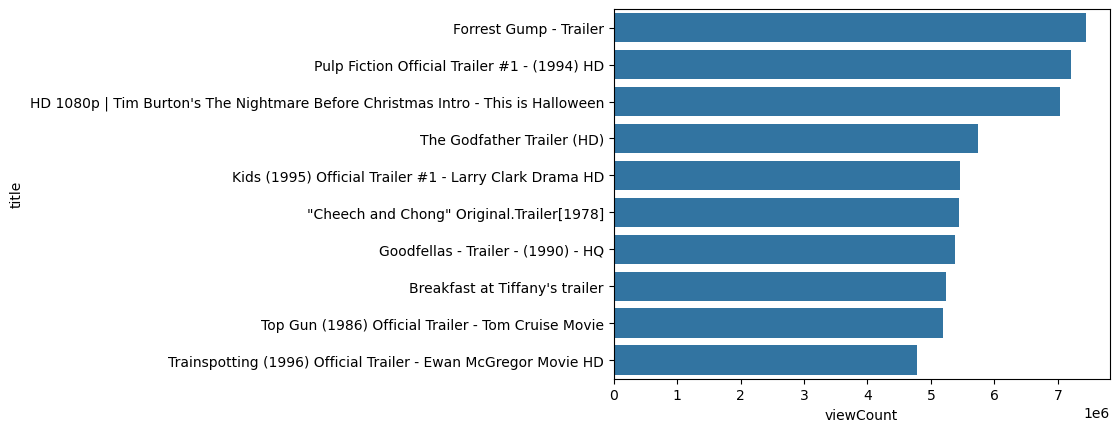

In [37]:
ax1= sns.barplot(x='viewCount',y='title', data=top10_views)
plt.show()

#plotting of bargraph

In [38]:
sample_pd['day']=pd.to_datetime(sample_pd['Date']).dt.strftime('%d') #unique plot for day-wise counts

In [39]:
sample_pd

title  \
0              Toy Story (1995) Trailer 2 (VHS Capture)   
1                                  Jumanji Trailer 1995   
2                            Grumpier Old Men - Trailer   
3                                     Waiting To Exhale   
4                                Heat Trailer HD (1995)   
...                                                 ...   
1008  Sling Blade (1996) Official Trailer - Billy Bo...   
1009                    Jingle All the Way Trailer [HQ]   
1010        Identificazione di una donna (1982) Trailer   
1011  Paradise Lost: The Child Murders at Robin Hood...   
1012         The Preacher's Wife (1996) - Movie Trailer   

                                                   desc        Date  \
0     Trailer for Toy Story (1995) captured from the...  2015-05-26   
1     Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2     The more things change, the more they stay the...  2010-10-26   
3     Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4     Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   
...                                                 ...         ...   
1008  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-07-06   
1009                No Copyright Infringement Intended.  2012-07-13   
1010  Identificazione di una donna (1982) Trailer\nA...  2010-04-12   
1011  Trailer for Berlinger and Sinofsky's documenta...  2009-01-12   
1012    starring Denzel Washington and Whitney Houston.  2008-04-14   

                                               comments duration  viewCount  \
0                                     comments_disabled  PT1M31S   118081.0   
1                                     comments_disabled  PT2M48S   199024.0   
2     [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224299.0   
3                                     comments_disabled  PT2M40S   437713.0   
4     [{'comment': 'The scene in which the lady with...  PT2M28S  1506463.0   
...                                                 ...      ...        ...   
1008  [{'comment': 'Who&#39;s here from deadpool and...  PT1M48S   718232.0   
1009  [{'comment': 'üéÖü§∂üèã‚Äç‚ôÇÔ∏è', 'user_id': 'UCKiwHp9Mgy...  PT2M32S   577197.0   
1010  [{'comment': '&quot;E&#39; proprio la corruzio...  PT3M18S   102976.0   
1011  [{'comment': 'Anyone that doesn&#39;t believe ...  PT1M35S   397777.0   
1012  [{'comment': 'Dear Fellow Uploader of this vid...  PT1M59S   294419.0   

      likeCount  commentCount  favoriteCount day  
0         151.0           0.0              0  26  
1         286.0           NaN              0  09  
2         221.0          13.0              0  26  
3           NaN           NaN              0  23  
4        8242.0         681.0              0  29  
...         ...           ...            ...  ..  
1008     2432.0         223.0              0  06  
1009      888.0         125.0              0  13  
1010      127.0          26.0              0  12  
1011      234.0         103.0              0  12  
1012      215.0          38.0              0  14  

[1013 rows x 10 columns]

In [40]:
sample_pd_date=sample_pd.groupby('day').size() #sorting 

In [41]:
sample_pd_date

day
01    22
02    38
03    35
04    25
05    46
06    46
07    33
08    51
09    36
10    36
11    36
12    38
13    43
14    39
15    30
16    28
17    31
18    27
19    25
20    40
21    36
22    28
23    26
24    23
25    16
26    26
27    38
28    31
29    28
30    27
31    29
dtype: int64

In [42]:
sample_pd_date=sample_pd.groupby('day',as_index=False).size()

In [43]:
sample_pd_date

day  size
0   01    22
1   02    38
2   03    35
3   04    25
4   05    46
5   06    46
6   07    33
7   08    51
8   09    36
9   10    36
10  11    36
11  12    38
12  13    43
13  14    39
14  15    30
15  16    28
16  17    31
17  18    27
18  19    25
19  20    40
20  21    36
21  22    28
22  23    26
23  24    23
24  25    16
25  26    26
26  27    38
27  28    31
28  29    28
29  30    27
30  31    29

In [44]:
sort_order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", 
 "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", 
 "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]


In [45]:
sample_pd_date.index=pd.CategoricalIndex(sample_pd_date['day'],categories=sort_order,ordered=True)

In [46]:
sample_pd_date

day  size
day          
NaN  01    22
NaN  02    38
NaN  03    35
NaN  04    25
NaN  05    46
NaN  06    46
NaN  07    33
NaN  08    51
NaN  09    36
10   10    36
11   11    36
12   12    38
13   13    43
14   14    39
15   15    30
16   16    28
17   17    31
18   18    27
19   19    25
20   20    40
21   21    36
22   22    28
23   23    26
24   24    23
25   25    16
26   26    26
27   27    38
28   28    31
29   29    28
30   30    27
31   31    29

In [47]:
sample_pd_date=sample_pd_date.sort_index()

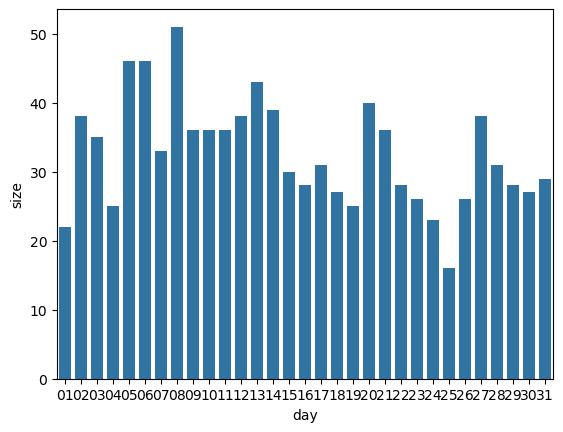

In [48]:
ax2= sns.barplot(x='day',y='size', data=sample_pd_date)
plt.show()

In [36]:
## assignment 1

1.	~100 comments~
2.	~Description of the video~
3.	~View Count~
4.	~Like Count~
5.	~Dislike Count~
6.	~Comment Count~
7.	~Duration of the video~
8.	~Favorite Count~

8/8 completed


After the data extraction is done, then please find out the following:

1.	A list of  the top-10 videos based on the total views - p
2.	A list of the bottom-10 videos based on the total views
3.	The most liked video
4.	The least liked video
5.	The video with the highest duration
6.	Apply sentiment analysis on the downloaded comments for each of the videos. For sentiment analysis, you can use VADER or any other tool of your choice. Your program should list the sentiments score for each of the movies


In [49]:
sample_pd.describe()

viewCount     likeCount  commentCount  favoriteCount
count  1.008000e+03    903.000000    894.000000         1013.0
mean   3.758751e+05   1338.787375    125.048098            0.0
std    7.855420e+05   3596.817905    311.693038            0.0
min    9.010000e+02      0.000000      0.000000            0.0
25%    2.866825e+04     88.000000      7.000000            0.0
50%    1.076995e+05    276.000000     25.000000            0.0
75%    3.573208e+05    940.500000     94.750000            0.0
max    7.444579e+06  36383.000000   3304.000000            0.0

In [50]:
top10_views

title  \
284                             Forrest Gump - Trailer   
235       Pulp Fiction Official Trailer #1 - (1994) HD   
442  HD 1080p | Tim Burton's The Nightmare Before C...   
645                         The Godfather Trailer (HD)   
134  Kids (1995) Official Trailer #1 - Larry Clark ...   
880          "Cheech and Chong" Original.Trailer[1978]   
897                 Goodfellas - Trailer - (1990) - HQ   
673                     Breakfast at Tiffany's trailer   
823  Top Gun (1986) Official Trailer - Tom Cruise M...   
593  Trainspotting (1996) Official Trailer - Ewan M...   

                                                  desc        Date  \
284  Stupid is as stupid does, says Forrest Gump (p...  2012-05-22   
235  Pulp Fiction movie clips: http://j.mp/1L5eDtj\...  2011-09-27   
442  This is the introduction to Tim Burton's "The ...  2009-12-07   
645  Update 7/14/16\nThanks for all the views! the ...  2011-09-18   
134  Subscribe to TRAILERS: http://bit.ly/sxaw6h\nS...  2013-08-21   
880  "Cheech and Chong" Original.Trailer[1978]\r\n"...  2007-11-17   
897  Trailer for Martin Scorsese's film starring Ro...  2009-02-17   
673  The original trailer to 1961's "Breakfast at T...  2007-05-17   
823  Starring: Tom Cruise, Tim Robbins, and Kelly M...  2016-09-07   
593  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-19   

                                              comments duration  viewCount  \
284                                  comments_disabled  PT3M47S  7444579.0   
235  [{'comment': 'Even the trailer of this movie i...   PT3M6S  7211779.0   
442  [{'comment': 'Who&#39;s the narrator?', 'user_...  PT4M29S  7041771.0   
645  [{'comment': 'Sergei Bondarchuk&#39;s War and ...  PT1M35S  5740598.0   
134  [{'comment': 'Not a single cellphone in sight....  PT1M47S  5453286.0   
880  [{'comment': '‚ù§üòÇüéâ Memories.', 'user_id': 'UCw5...  PT3M11S  5445297.0   
897  [{'comment': 'Rip Ray ,Best Good Fella ever ‚ù§'...     PT3M  5386143.0   
673  [{'comment': 'The trailer announcer mispronoun...  PT2M39S  5231108.0   
823  [{'comment': 'Best movie ever', 'user_id': 'UC...  PT1M29S  5189725.0   
593  [{'comment': 'will watch', 'user_id': 'UC1hG3k...  PT1M55S  4785128.0   

     likeCount  commentCount  favoriteCount  
284        NaN           NaN              0  
235    34975.0        1890.0              0  
442    31863.0        2676.0              0  
645    26248.0        1518.0              0  
134    22833.0        2438.0              0  
880     8804.0         739.0              0  
897    19168.0        2088.0              0  
673    10629.0        1252.0              0  
823    36383.0        1657.0              0  
593    25857.0         751.0              0

In [51]:
top10_likes

title  \
823  Top Gun (1986) Official Trailer - Tom Cruise M...   
235       Pulp Fiction Official Trailer #1 - (1994) HD   
442  HD 1080p | Tim Burton's The Nightmare Before C...   
282  The Crow (1994) Official Trailer - Brandon Lee...   
645                         The Godfather Trailer (HD)   
593  Trainspotting (1996) Official Trailer - Ewan M...   
412         Poetic Justice (1993) - Getting Acquainted   
134  Kids (1995) Official Trailer #1 - Larry Clark ...   
472  Batman (1989) Official Trailer #1 - Tim Burton...   
897                 Goodfellas - Trailer - (1990) - HQ   

                                                  desc        Date  \
823  Starring: Tom Cruise, Tim Robbins, and Kelly M...  2016-09-07   
235  Pulp Fiction movie clips: http://j.mp/1L5eDtj\...  2011-09-27   
442  This is the introduction to Tim Burton's "The ...  2009-12-07   
282  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-15   
645  Update 7/14/16\nThanks for all the views! the ...  2011-09-18   
593  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-19   
412  Poetic Justice is a 1993 drama/romance film st...  2015-09-04   
134  Subscribe to TRAILERS: http://bit.ly/sxaw6h\nS...  2013-08-21   
472  Check out the official Batman (1989) Trailer s...  2013-12-12   
897  Trailer for Martin Scorsese's film starring Ro...  2009-02-17   

                                              comments duration  viewCount  \
823  [{'comment': 'Best movie ever', 'user_id': 'UC...  PT1M29S  5189725.0   
235  [{'comment': 'Even the trailer of this movie i...   PT3M6S  7211779.0   
442  [{'comment': 'Who&#39;s the narrator?', 'user_...  PT4M29S  7041771.0   
282  [{'comment': '‚ù§', 'user_id': 'UC7yPEo8Rr_tJEjg...  PT1M26S  3690129.0   
645  [{'comment': 'Sergei Bondarchuk&#39;s War and ...  PT1M35S  5740598.0   
593  [{'comment': 'will watch', 'user_id': 'UC1hG3k...  PT1M55S  4785128.0   
412  [{'comment': 'He started it lol', 'user_id': '...  PT4M55S  1725683.0   
134  [{'comment': 'Not a single cellphone in sight....  PT1M47S  5453286.0   
472                                  comments_disabled  PT1M48S  2622926.0   
897  [{'comment': 'Rip Ray ,Best Good Fella ever ‚ù§'...     PT3M  5386143.0   

     likeCount  commentCount  favoriteCount  
823    36383.0        1657.0              0  
235    34975.0        1890.0              0  
442    31863.0        2676.0              0  
282    29056.0        2257.0              0  
645    26248.0        1518.0              0  
593    25857.0         751.0              0  
412    24858.0        2877.0              0  
134    22833.0        2438.0              0  
472    19961.0           0.0              0  
897    19168.0        2088.0              0

In [54]:
max_min_stat(sample_pd,'likeCount',1)

title  \
489                                Bread & Chocolate 3   
624                                        Echte Kerle   
669                The Philadelphia Story 1940 Trailer   
853  The children are watching us/I bambini ci guar...   
713                    Bringing Up Baby (1938) Trailer   
710                   His Girl Friday (1940) Trailer 1   
695                         Notorious (1946) Trailer 2   
336            Being Human (1994) Teaser (VHS Capture)   
726                        Beat the Devil 1953 Trailer   
24                Wings of Courage - Trailer | Crackle   

                                                  desc        Date  \
489                                Bread & Chocolate 3  2010-12-18   
624  Diese unb√§ndige Kraft ist wirklich beeindrucke...  2007-06-26   
669  Philadelphia heiress Tracy Lord throws out her...  2014-10-26   
853  alcune immagini di "The children are watching ...  2015-02-20   
713  David Huxley is waiting to get a bone he needs...  2014-10-22   
710  Hildy Johnson has divorced Walter Burns and vi...  2014-10-23   
695  Released shortly after the war, this classic H...  2014-10-24   
336  Teaser for Being Human (1994) captured from th...  2015-07-19   
726  Download film:\nhttp://letitbit.net/download/1...  2011-03-24   
24   All your favorite Crackle content has made the...  2011-01-05   

                                              comments duration  viewCount  \
489                                                 []  PT9M32S     1562.0   
624  [{'comment': 'hetenkrempel.............', 'use...  PT1M25S     3820.0   
669                                                 []  PT3M32S      901.0   
853                                                 []  PT1M39S     1786.0   
713                                                 []  PT2M20S      948.0   
710                                                 []  PT1M40S     2467.0   
695                                                 []  PT2M32S     2571.0   
336  [{'comment': 'R.I.P. Robin Williams', 'user_id...    PT31S     3146.0   
726                                                 []    PT28S     3833.0   
24                                                  []   PT1M5S     3822.0   

     likeCount  commentCount  favoriteCount day  
489        0.0           0.0              0  18  
624        1.0           1.0              0  26  
669        1.0           0.0              0  26  
853        2.0           0.0              0  20  
713        3.0           0.0              0  22  
710        5.0           0.0              0  23  
695        5.0           0.0              0  24  
336        5.0           2.0              0  19  
726        5.0           0.0              0  24  
24         5.0           0.0              0  05

In [55]:
max_min_stat(sample_pd,'likeCount',0)

title  \
823  Top Gun (1986) Official Trailer - Tom Cruise M...   
235       Pulp Fiction Official Trailer #1 - (1994) HD   
442  HD 1080p | Tim Burton's The Nightmare Before C...   
282  The Crow (1994) Official Trailer - Brandon Lee...   
645                         The Godfather Trailer (HD)   
593  Trainspotting (1996) Official Trailer - Ewan M...   
412         Poetic Justice (1993) - Getting Acquainted   
134  Kids (1995) Official Trailer #1 - Larry Clark ...   
472  Batman (1989) Official Trailer #1 - Tim Burton...   
897                 Goodfellas - Trailer - (1990) - HQ   

                                                  desc        Date  \
823  Starring: Tom Cruise, Tim Robbins, and Kelly M...  2016-09-07   
235  Pulp Fiction movie clips: http://j.mp/1L5eDtj\...  2011-09-27   
442  This is the introduction to Tim Burton's "The ...  2009-12-07   
282  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-15   
645  Update 7/14/16\nThanks for all the views! the ...  2011-09-18   
593  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-19   
412  Poetic Justice is a 1993 drama/romance film st...  2015-09-04   
134  Subscribe to TRAILERS: http://bit.ly/sxaw6h\nS...  2013-08-21   
472  Check out the official Batman (1989) Trailer s...  2013-12-12   
897  Trailer for Martin Scorsese's film starring Ro...  2009-02-17   

                                              comments duration  viewCount  \
823  [{'comment': 'Best movie ever', 'user_id': 'UC...  PT1M29S  5189725.0   
235  [{'comment': 'Even the trailer of this movie i...   PT3M6S  7211779.0   
442  [{'comment': 'Who&#39;s the narrator?', 'user_...  PT4M29S  7041771.0   
282  [{'comment': '‚ù§', 'user_id': 'UC7yPEo8Rr_tJEjg...  PT1M26S  3690129.0   
645  [{'comment': 'Sergei Bondarchuk&#39;s War and ...  PT1M35S  5740598.0   
593  [{'comment': 'will watch', 'user_id': 'UC1hG3k...  PT1M55S  4785128.0   
412  [{'comment': 'He started it lol', 'user_id': '...  PT4M55S  1725683.0   
134  [{'comment': 'Not a single cellphone in sight....  PT1M47S  5453286.0   
472                                  comments_disabled  PT1M48S  2622926.0   
897  [{'comment': 'Rip Ray ,Best Good Fella ever ‚ù§'...     PT3M  5386143.0   

     likeCount  commentCount  favoriteCount day  
823    36383.0        1657.0              0  07  
235    34975.0        1890.0              0  27  
442    31863.0        2676.0              0  07  
282    29056.0        2257.0              0  15  
645    26248.0        1518.0              0  18  
593    25857.0         751.0              0  19  
412    24858.0        2877.0              0  04  
134    22833.0        2438.0              0  21  
472    19961.0           0.0              0  12  
897    19168.0        2088.0              0  17

In [56]:
max_min_stat(sample_pd,'viewCount',1)

title  \
669                The Philadelphia Story 1940 Trailer   
827                       The Leopard Son Trailer 1996   
713                    Bringing Up Baby (1938) Trailer   
559  SPITFIRE - RUBBER ROSIE (LOWLIFE RECORDINGS 1994)   
489                                Bread & Chocolate 3   
225                             New York Cop - Trailer   
719  Watch Movies Free : They Made Me A Criminal (1...   
853  The children are watching us/I bambini ci guar...   
832                  All About Chad - Sleepover (1995)   
620                                           Power 98   

                                                  desc        Date  \
669  Philadelphia heiress Tracy Lord throws out her...  2014-10-26   
827  The Leopard Son Trailer 1996\nDirector: Hugo V...  2014-11-15   
713  David Huxley is waiting to get a bone he needs...  2014-10-22   
559  SPITFIRE - RUBBER ROSIE - LOWLIFE RECORDINGS 1...  2012-03-03   
489                                Bread & Chocolate 3  2010-12-18   
225  Allegedly based on a true story, this film fol...  2011-07-28   
719  Free Classic Hollywood Feature Films at http:/...  2014-05-19   
853  alcune immagini di "The children are watching ...  2015-02-20   
832  All About Chad - Sleepover \nfrom CD "Down In ...  2013-10-14   
620  A high profile DJ accidentally kills a woman, ...  2014-01-30   

                                              comments    duration  viewCount  \
669                                                 []     PT3M32S      901.0   
827                                                 []      PT1M4S      909.0   
713                                                 []     PT2M20S      948.0   
559  [{'comment': 'Basement club - 90s - rock n rol...     PT3M19S      949.0   
489                                                 []     PT9M32S     1562.0   
225  [{'comment': 'Juat found out about ir andan th...     PT1M29S     1683.0   
719  [{'comment': 'What am I doing?', 'user_id': 'U...  PT1H31M13S     1708.0   
853                                                 []     PT1M39S     1786.0   
832  [{'comment': 'reee', 'user_id': 'UCCYTwwCHqsrD...      PT3M8S     1815.0   
620                                                 []     PT2M12S     1819.0   

     likeCount  commentCount  favoriteCount day  
669        1.0           0.0              0  26  
827        6.0           0.0              0  15  
713        3.0           0.0              0  22  
559       16.0           1.0              0  03  
489        0.0           0.0              0  18  
225       16.0           4.0              0  28  
719        7.0           1.0              0  19  
853        2.0           0.0              0  20  
832       29.0           2.0              0  14  
620        NaN           0.0              0  30

In [57]:
max_min_stat(sample_pd,'viewCount',0)

title  \
284                             Forrest Gump - Trailer   
235       Pulp Fiction Official Trailer #1 - (1994) HD   
442  HD 1080p | Tim Burton's The Nightmare Before C...   
645                         The Godfather Trailer (HD)   
134  Kids (1995) Official Trailer #1 - Larry Clark ...   
880          "Cheech and Chong" Original.Trailer[1978]   
897                 Goodfellas - Trailer - (1990) - HQ   
673                     Breakfast at Tiffany's trailer   
823  Top Gun (1986) Official Trailer - Tom Cruise M...   
593  Trainspotting (1996) Official Trailer - Ewan M...   

                                                  desc        Date  \
284  Stupid is as stupid does, says Forrest Gump (p...  2012-05-22   
235  Pulp Fiction movie clips: http://j.mp/1L5eDtj\...  2011-09-27   
442  This is the introduction to Tim Burton's "The ...  2009-12-07   
645  Update 7/14/16\nThanks for all the views! the ...  2011-09-18   
134  Subscribe to TRAILERS: http://bit.ly/sxaw6h\nS...  2013-08-21   
880  "Cheech and Chong" Original.Trailer[1978]\r\n"...  2007-11-17   
897  Trailer for Martin Scorsese's film starring Ro...  2009-02-17   
673  The original trailer to 1961's "Breakfast at T...  2007-05-17   
823  Starring: Tom Cruise, Tim Robbins, and Kelly M...  2016-09-07   
593  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-05-19   

                                              comments duration  viewCount  \
284                                  comments_disabled  PT3M47S  7444579.0   
235  [{'comment': 'Even the trailer of this movie i...   PT3M6S  7211779.0   
442  [{'comment': 'Who&#39;s the narrator?', 'user_...  PT4M29S  7041771.0   
645  [{'comment': 'Sergei Bondarchuk&#39;s War and ...  PT1M35S  5740598.0   
134  [{'comment': 'Not a single cellphone in sight....  PT1M47S  5453286.0   
880  [{'comment': '‚ù§üòÇüéâ Memories.', 'user_id': 'UCw5...  PT3M11S  5445297.0   
897  [{'comment': 'Rip Ray ,Best Good Fella ever ‚ù§'...     PT3M  5386143.0   
673  [{'comment': 'The trailer announcer mispronoun...  PT2M39S  5231108.0   
823  [{'comment': 'Best movie ever', 'user_id': 'UC...  PT1M29S  5189725.0   
593  [{'comment': 'will watch', 'user_id': 'UC1hG3k...  PT1M55S  4785128.0   

     likeCount  commentCount  favoriteCount day  
284        NaN           NaN              0  22  
235    34975.0        1890.0              0  27  
442    31863.0        2676.0              0  07  
645    26248.0        1518.0              0  18  
134    22833.0        2438.0              0  21  
880     8804.0         739.0              0  17  
897    19168.0        2088.0              0  17  
673    10629.0        1252.0              0  17  
823    36383.0        1657.0              0  07  
593    25857.0         751.0              0  19

In [59]:
import re
def parse_duration(duration):
    # Use regular expressions to extract hours, minutes, and seconds
    pattern = r"PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?"
    matches = re.match(pattern, duration)
    
    # Extract hours, minutes, and seconds
    hours = int(matches.group(1)) if matches.group(1) else 0
    minutes = int(matches.group(2)) if matches.group(2) else 0
    seconds = int(matches.group(3)) if matches.group(3) else 0
    
    # Convert to pandas Timedelta
    return pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)

# Apply the function to the Duration column
sample_pd['Timedelta'] = sample_pd['duration'].apply(parse_duration)

# Extract hours, minutes, and seconds into separate columns (optional)
# df['Hours'] = df['Timedelta'].dt.components.hours
# df['Minutes'] = df['Timedelta'].dt.components.minutes
# df['Seconds'] = df['Timedelta'].dt.components.seconds

In [60]:
sample_pd

title  \
0              Toy Story (1995) Trailer 2 (VHS Capture)   
1                                  Jumanji Trailer 1995   
2                            Grumpier Old Men - Trailer   
3                                     Waiting To Exhale   
4                                Heat Trailer HD (1995)   
...                                                 ...   
1008  Sling Blade (1996) Official Trailer - Billy Bo...   
1009                    Jingle All the Way Trailer [HQ]   
1010        Identificazione di una donna (1982) Trailer   
1011  Paradise Lost: The Child Murders at Robin Hood...   
1012         The Preacher's Wife (1996) - Movie Trailer   

                                                   desc        Date  \
0     Trailer for Toy Story (1995) captured from the...  2015-05-26   
1     Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2     The more things change, the more they stay the...  2010-10-26   
3     Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4     Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   
...                                                 ...         ...   
1008  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-07-06   
1009                No Copyright Infringement Intended.  2012-07-13   
1010  Identificazione di una donna (1982) Trailer\nA...  2010-04-12   
1011  Trailer for Berlinger and Sinofsky's documenta...  2009-01-12   
1012    starring Denzel Washington and Whitney Houston.  2008-04-14   

                                               comments duration  viewCount  \
0                                     comments_disabled  PT1M31S   118081.0   
1                                     comments_disabled  PT2M48S   199024.0   
2     [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224299.0   
3                                     comments_disabled  PT2M40S   437713.0   
4     [{'comment': 'The scene in which the lady with...  PT2M28S  1506463.0   
...                                                 ...      ...        ...   
1008  [{'comment': 'Who&#39;s here from deadpool and...  PT1M48S   718232.0   
1009  [{'comment': 'üéÖü§∂üèã‚Äç‚ôÇÔ∏è', 'user_id': 'UCKiwHp9Mgy...  PT2M32S   577197.0   
1010  [{'comment': '&quot;E&#39; proprio la corruzio...  PT3M18S   102976.0   
1011  [{'comment': 'Anyone that doesn&#39;t believe ...  PT1M35S   397777.0   
1012  [{'comment': 'Dear Fellow Uploader of this vid...  PT1M59S   294419.0   

      likeCount  commentCount  favoriteCount day       Timedelta  
0         151.0           0.0              0  26 0 days 00:01:31  
1         286.0           NaN              0  09 0 days 00:02:48  
2         221.0          13.0              0  26 0 days 00:01:52  
3           NaN           NaN              0  23 0 days 00:02:40  
4        8242.0         681.0              0  29 0 days 00:02:28  
...         ...           ...            ...  ..             ...  
1008     2432.0         223.0              0  06 0 days 00:01:48  
1009      888.0         125.0              0  13 0 days 00:02:32  
1010      127.0          26.0              0  12 0 days 00:03:18  
1011      234.0         103.0              0  12 0 days 00:01:35  
1012      215.0          38.0              0  14 0 days 00:01:59  

[1013 rows x 11 columns]

In [61]:
 # Extract hours, minutes, and seconds into separate columns (optional)
sample_pd['Hours'] = sample_pd['Timedelta'].dt.components.hours
sample_pd['Minutes'] = sample_pd['Timedelta'].dt.components.minutes
sample_pd['Seconds'] = sample_pd['Timedelta'].dt.components.seconds

In [62]:
sample_pd

title  \
0              Toy Story (1995) Trailer 2 (VHS Capture)   
1                                  Jumanji Trailer 1995   
2                            Grumpier Old Men - Trailer   
3                                     Waiting To Exhale   
4                                Heat Trailer HD (1995)   
...                                                 ...   
1008  Sling Blade (1996) Official Trailer - Billy Bo...   
1009                    Jingle All the Way Trailer [HQ]   
1010        Identificazione di una donna (1982) Trailer   
1011  Paradise Lost: The Child Murders at Robin Hood...   
1012         The Preacher's Wife (1996) - Movie Trailer   

                                                   desc        Date  \
0     Trailer for Toy Story (1995) captured from the...  2015-05-26   
1     Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2     The more things change, the more they stay the...  2010-10-26   
3     Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4     Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   
...                                                 ...         ...   
1008  Subscribe to CLASSIC TRAILERS: http://bit.ly/1...  2015-07-06   
1009                No Copyright Infringement Intended.  2012-07-13   
1010  Identificazione di una donna (1982) Trailer\nA...  2010-04-12   
1011  Trailer for Berlinger and Sinofsky's documenta...  2009-01-12   
1012    starring Denzel Washington and Whitney Houston.  2008-04-14   

                                               comments duration  viewCount  \
0                                     comments_disabled  PT1M31S   118081.0   
1                                     comments_disabled  PT2M48S   199024.0   
2     [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224299.0   
3                                     comments_disabled  PT2M40S   437713.0   
4     [{'comment': 'The scene in which the lady with...  PT2M28S  1506463.0   
...                                                 ...      ...        ...   
1008  [{'comment': 'Who&#39;s here from deadpool and...  PT1M48S   718232.0   
1009  [{'comment': 'üéÖü§∂üèã‚Äç‚ôÇÔ∏è', 'user_id': 'UCKiwHp9Mgy...  PT2M32S   577197.0   
1010  [{'comment': '&quot;E&#39; proprio la corruzio...  PT3M18S   102976.0   
1011  [{'comment': 'Anyone that doesn&#39;t believe ...  PT1M35S   397777.0   
1012  [{'comment': 'Dear Fellow Uploader of this vid...  PT1M59S   294419.0   

      likeCount  commentCount  favoriteCount day       Timedelta  Hours  \
0         151.0           0.0              0  26 0 days 00:01:31      0   
1         286.0           NaN              0  09 0 days 00:02:48      0   
2         221.0          13.0              0  26 0 days 00:01:52      0   
3           NaN           NaN              0  23 0 days 00:02:40      0   
4        8242.0         681.0              0  29 0 days 00:02:28      0   
...         ...           ...            ...  ..             ...    ...   
1008     2432.0         223.0              0  06 0 days 00:01:48      0   
1009      888.0         125.0              0  13 0 days 00:02:32      0   
1010      127.0          26.0              0  12 0 days 00:03:18      0   
1011      234.0         103.0              0  12 0 days 00:01:35      0   
1012      215.0          38.0              0  14 0 days 00:01:59      0   

      Minutes  Seconds  
0           1       31  
1           2       48  
2           1       52  
3           2       40  
4           2       28  
...       ...      ...  
1008        1       48  
1009        2       32  
1010        3       18  
1011        1       35  
1012        1       59  

[1013 rows x 14 columns]

In [64]:
max_duration = sample_pd['Timedelta'].max()
min_duration = sample_pd['Timedelta'].min()
mean_duration = sample_pd['Timedelta'].mean()
total_duration = sample_pd['Timedelta'].sum()

In [65]:
max_duration

Timedelta('0 days 02:31:47')

In [66]:
min_duration

Timedelta('0 days 00:00:15')

In [67]:
mean_duration

Timedelta('0 days 00:03:37.227048371')

In [68]:
total_duration

Timedelta('2 days 13:07:31')

1.	~A list of  the top-10 videos based on the total views~
2.	~A list of the bottom-10 videos based on the total views~
3.	~The most liked video~
4.	~The least liked video~
5.	~The video with the highest duration~
6.	Apply sentiment analysis on the downloaded comments for each of the videos. For sentiment analysis, you can use VADER or any other tool of your choice. Your program should list the sentiments score for each of the movies


5/6